<a href="https://colab.research.google.com/github/KevinCY-Kim/Deeplearning/blob/main/%ED%86%B5%EA%B3%84%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0(%EC%B6%94%EA%B0%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 통계의 이해

* 통계 개요 (모집단·표본, 기술통계 vs 추론통계)
* 확률과 확률분포 (이항분포·정규분포 핵심)
* 추정과 가설검정 (신뢰구간, p-value 해석)

✅ 핵심: 검정 흐름 확인: “p<0.05이면 귀무가설 기각”

2. 기초통계 (검정 2종) Day1 확인

* t-검정 (단일/독립/대응 t-검정)
* 분산분석(ANOVA) 기본 구조(집단 간 비교)


1. 통계 분석 흐름(공통)

1) 문제정의 & 가설 설정

(1) 귀무가설 H0 vs 대립가설 H1

* 귀무가설(H0): “차이/효과/상관이 없다” = 가설
* 대립가설(H1): “차이/효과/상관이 있다(또는 특정 방향으로 있다)” = 주장
    예시(평균 비교):
    * H0: μ = μ₀
    * H1(양측): μ ≠ μ₀
    * H1(단측): μ > μ₀ (또는 μ < μ₀)


✔️ 왜 H0를 기본으로 두나?
→ 검정 통계량의 분포를 아는 쪽(H0)에서 극단성(“이 정도면 이상하다”)을 계산하기 쉽기 때문이다.

(2) 유의수준 α (= 제1종 오류)

* 유의수준 α: H0가 사실인데도 (즉, 실제로 효과가 없는데도) 기각할 확률
    보통 0.05(5%)를 채택한다.

  → “오탐(false positive)을 5%까지 허용함을 의미한다.

* 관련 개념
    * 제1종 오류(α): 없는데 있다고 함
        → 발생하면 더 큰 문제라서 “1종”
    * 제2종 오류(β): 있는데 없다고 함
    * 검정력(1−β): 실제로 효과가 있을 때 잡아낼 확률 (표본수↑, 분산↓, 효과크기↑ → 검정력↑)
* α 설정 팁
    * 안전·품질·의료처럼 오탐 비용이 큰 경우 0.01 등 더 엄격하게 설정한다. ****
    * 탐색적 분석, 초기 스크리닝은 0.10도 쓰지만, 재현성·후속검증 필요하다.

(3) 유의수준 양측(양방) vs 단측(단방) 검정

* 양측검정 사용하는 경우
    * 기본값: 방향을 단정하기 어렵거나, 양쪽 방향의 차이 모두가 중요할 때
    * 가설: H0: μ=μ₀, H1: μ≠μ₀.
    * 임상/품질에서 표준 대비 증가도 위험, 감소도 위험이면 양측이 타당함.
* 단측검정 사용하는 경우
    * 한 방향만 의미가 있을 때
        → 다른 방향은 관심 밖이거나 물리적으로 불가능한 경우
        * 예: 새로운 공정의 불량률이 줄었는지만 중요(늘었는지는 관심 없음)
    * 가설: H0: μ≤μ₀, H1: μ>μ₀ (또는 반대 방향)
    * 주의: 단측은 같은 α에서 임계값이 한쪽 꼬리에만 있어 검정이 더 민감해짐 → 남용 금지
* 주의사항
    * p-해킹: 데이터를 본 뒤에 유리한 방향으로 단측으로 바꾸는 것
    * 사전등록/분석계획서에 검정 방향을 미리 명확하게 기재해야 하는 것이 원칙이다.
* p-value 차이 직관 예시(표준정규 가정)
    * z = 1.80일 때
        * 양측 p = 2×(1−Φ(1.80)) ≈ 0.071 → 기각 실패(α=0.05)
        * 단측 p = 1−Φ(1.80) ≈ 0.036 → 기각(α=0.05, ‘오른쪽 꼬리’ 가정 시)
    * 같은 데이터라도 방향 선택에 따라 결론이 달라질 수 있다. → 그래서 단측은 더 엄격히 사전 지정해야 한다.


# 2. 임계값·검정통계량·해석

(1) 절차(빈도주의 가설검정의 표준 흐름)

* H0/H1 설정, α 결정(예: 0.05), 단·양측방법 결정
* 적절한 검정(예: t, z, χ², F)방법을 선택해야 한다.
* 표본으로부터 검정통계량 계산 → H0 분포로 p-value를 산출한다.
* p < α면 H0 기각(효과 ‘있을 가능성’ 뒷받침), p ≥ α면 기각 :x:
    * 주의: p≥0.05 ⇒ “효과 없다”가 아니라 “증거가 부족하다”는 것을 의미한다.

   → 검정력·표본수·효과크기를 재점검하자


# 1. 이론 보강 (형이 적은 내용 + 내가 추가하는 포인트)
✅ 모집단·표본

   모집단(population): 우리가 궁금한 전체 집단

   표본(sample): 모집단에서 뽑은 일부 데이터

   통계학에서는 항상 표본 → 모집단 추론이 핵심

✅ 기술통계 vs 추론통계

   기술통계: 평균, 분산, 히스토그램처럼 데이터 요약

   추론통계: t-test, ANOVA, 회귀처럼 표본으로 모집단의 성질 추론

✅ 검정 절차 요약

   H0/H1 설정

   H0: 차이 없음

   H1: 차이 있음 (양측 or 단측)

   유의수준(α) 설정 (보통 0.05)

   검정통계량 계산 (t, F, χ² 등)

   p-value 산출

   p < α → H0 기각

   p ≥ α → H0 기각 못함 (효과 없음이 아님, “증거 부족”)

✅ p-value 직관

   p = 0.03, α=0.05 → “데이터가 이렇게 극단적일 확률이 3%밖에 안 되네 → H0 기각”

   p = 0.20 → “데이터가 흔히 일어날 수 있네 → H0 유지”

✅ 전제조건 & 대안

   정규성: Shapiro-Wilk

   등분산성: Levene test

   독립성: 실험 설계로 확보

   전제 깨지면? → 비모수 검정 (Mann-Whitney U, Kruskal-Wallis 등)

✅ 분산분석(ANOVA) vs 공분산분석(ANCOVA)

   ANOVA: 집단 간 평균 비교

   ANCOVA: 집단 간 평균 비교 + 공변량(연속형 보정 변수) 고려
   → 임상/실험 데이터에서 baseline 차이를 보정할 때 자주 씀

(1) p-value와 임계값 시각화

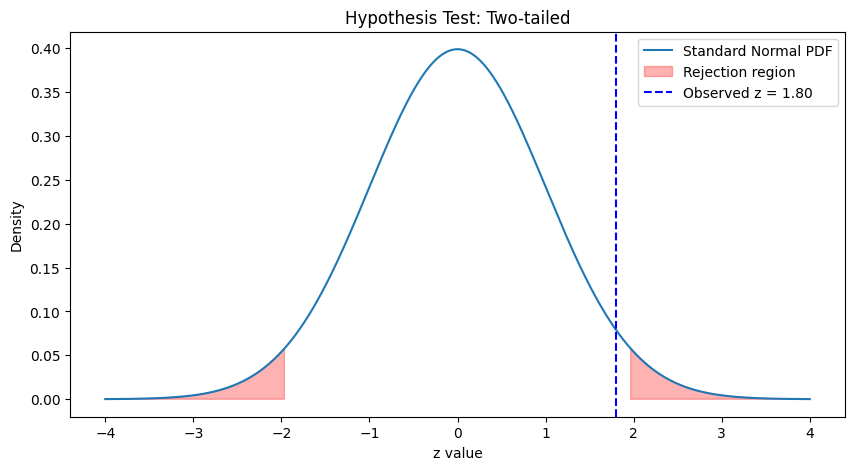

In [1]:
# (1) p-value와 임계값 시각화
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 표준정규분포
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

z_value = 1.8  # 예시 검정통계량
alpha = 0.05

# 양측검정: 임계값
z_crit = norm.ppf(1 - alpha/2)

plt.figure(figsize=(10,5))
plt.plot(x, y, label="Standard Normal PDF")

# 임계영역 음영
plt.fill_between(x, 0, y, where=(x <= -z_crit) | (x >= z_crit), color="red", alpha=0.3, label="Rejection region")

# 관측 z-value 표시
plt.axvline(z_value, color="blue", linestyle="--", label=f"Observed z = {z_value:.2f}")

plt.title("Hypothesis Test: Two-tailed")
plt.xlabel("z value")
plt.ylabel("Density")
plt.legend()
plt.show()


(2) 정규성 위배 시 → Mann-Whitney U test 예제

In [2]:
from scipy.stats import mannwhitneyu

# 비정규 분포 데이터 생성
group1 = np.random.exponential(scale=1, size=30)
group2 = np.random.exponential(scale=1.5, size=30)

stat, p = mannwhitneyu(group1, group2)

print("Mann-Whitney U Test:")
print(f"Statistic={stat:.3f}, p-value={p:.3f}")


Mann-Whitney U Test:
Statistic=395.000, p-value=0.420


(3) t-test / ANOVA / ANCOVA 코드 골격

In [10]:
!pip install Sepal

ANOVA results:
                sum_sq     df           F        PR(>F)
C(Species)  63.212133    2.0  119.264502  1.669669e-31
Residual    38.956200  147.0         NaN           NaN


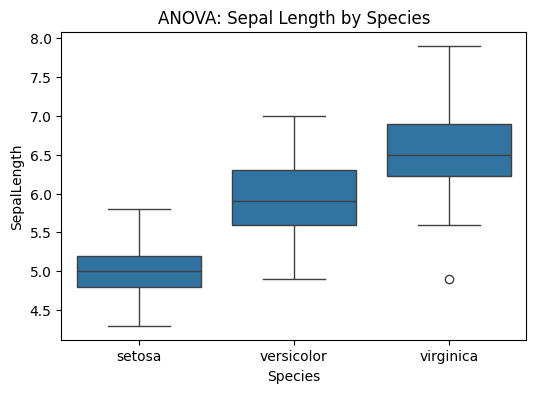

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터 불러오기 + rename
df = sm.datasets.get_rdataset("iris").data
df = df.rename(columns={
    "Sepal.Length": "SepalLength",
    "Sepal.Width": "SepalWidth",
    "Petal.Length": "PetalLength",
    "Petal.Width": "PetalWidth"
})

# ANOVA
model = ols("SepalLength ~ C(Species)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:\n", anova_table)

# Boxplot (ANOVA 시각화)
plt.figure(figsize=(6,4))
sns.boxplot(x="Species", y="SepalLength", data=df)
plt.title("ANOVA: Sepal Length by Species")
plt.show()